## IMPORT DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [2]:
df = pd.read_csv(r"C:\Users\Dickson\Obesity Level\Obesity prediction.csv")

In [3]:
df.head(5)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [6]:
df.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [8]:
df['Obesity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64

In [11]:
df.select_dtypes(include='object').columns

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'Obesity'],
      dtype='object')

## Visualize Data

<Axes: xlabel='Obesity', ylabel='count'>

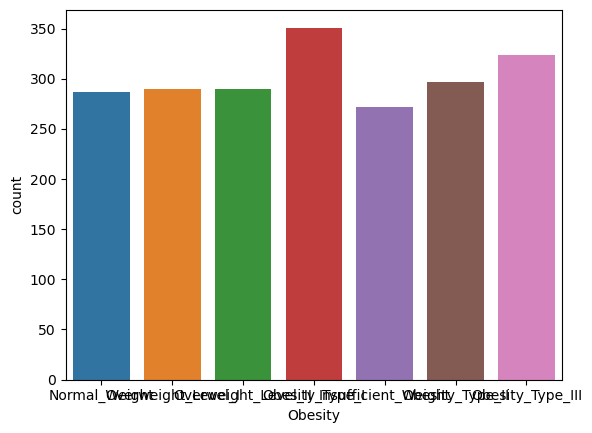

In [12]:
sns.countplot(x='Obesity', data=df)

<Axes: xlabel='Gender', ylabel='count'>

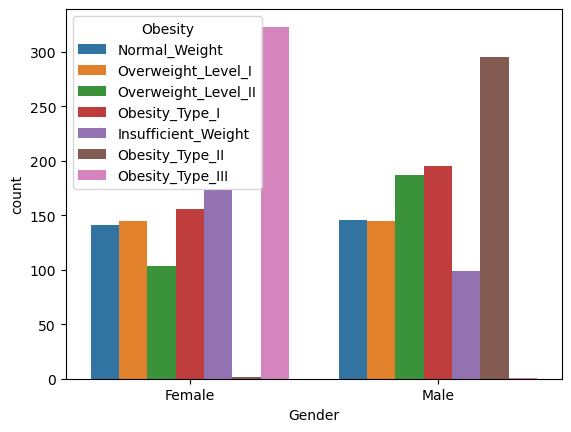

In [15]:
sns.countplot(x='Gender',hue='Obesity', data=df)

## Encoding Categorical Values

In [16]:
df.select_dtypes(include='object').columns

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'Obesity'],
      dtype='object')

In [17]:
cat_col = df.select_dtypes(include='object').columns.drop('Obesity')

In [18]:
df = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])

In [21]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,1,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,1,...,0,0,0,0,1,0,0,0,1,0


In [23]:
df['Obesity'].head()

0    1
1    1
2    1
3    5
4    6
Name: Obesity, dtype: int32

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2111 non-null   float64
 1   Height                        2111 non-null   float64
 2   Weight                        2111 non-null   float64
 3   FCVC                          2111 non-null   float64
 4   NCP                           2111 non-null   float64
 5   CH2O                          2111 non-null   float64
 6   FAF                           2111 non-null   float64
 7   TUE                           2111 non-null   float64
 8   Obesity                       2111 non-null   int32  
 9   Gender_Male                   2111 non-null   uint8  
 10  family_history_yes            2111 non-null   uint8  
 11  FAVC_yes                      2111 non-null   uint8  
 12  CAEC_Frequently               2111 non-null   uint8  
 13  CAE

In [25]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,3.015632,0.505921,...,0.024159,0.020843,0.045476,0.033160,0.663667,0.302700,0.003316,0.005211,0.748460,0.026528
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,1.952090,0.500083,...,0.153580,0.142893,0.208395,0.179096,0.472566,0.459535,0.057502,0.072015,0.434001,0.160737
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.236170,0.048394,...,-0.061795,0.091987,-0.116283,0.082566,-0.012483,-0.018803,0.003652,0.020286,-0.554448,-0.063064
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.038986,0.618466,...,-0.095625,0.055499,-0.133753,0.045518,0.107070,-0.127828,0.028996,-0.010471,-0.089684,0.036951
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.387643,0.161668,...,-0.106260,0.025746,-0.201906,-0.041778,0.259599,-0.249828,-0.021745,-0.037300,0.059332,-0.100805
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.018522,-0.274505,...,-0.103902,0.014320,0.071852,-0.018655,0.082804,-0.077072,-0.029843,-0.007512,0.057966,0.013991
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,-0.092616,0.067600,...,-0.146328,0.007811,-0.015624,-0.019126,0.099280,-0.092407,0.023312,0.003875,-0.056849,0.006502
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.108868,0.107930,...,0.159008,-0.031995,0.008036,0.049442,0.062251,-0.083272,0.026139,-0.000946,0.037504,0.008307
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,-0.129564,0.189607,...,0.024298,0.011216,0.074221,0.054739,-0.136138,0.118678,0.067129,-0.016351,-0.048751,0.108927
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.069448,0.017269,...,-0.110870,0.017613,-0.010928,0.060964,-0.102871,0.079755,-0.021725,-0.067402,0.143597,0.073404
Obesity,0.236170,0.038986,0.387643,0.018522,-0.092616,0.108868,-0.129564,-0.069448,1.000000,0.024908,...,0.066715,-0.023256,-0.050679,0.047318,0.114104,-0.134716,-0.017351,-0.034293,-0.003748,-0.073823
Gender_Male,0.048394,0.618466,0.161668,-0.274505,0.067600,0.107930,0.189607,0.017269,0.024908,1.000000,...,0.062930,0.044698,-0.102633,0.034848,-0.037694,0.024163,0.057001,0.045203,-0.160184,0.039317


<Axes: title={'center': 'Correlated with Obesity'}>

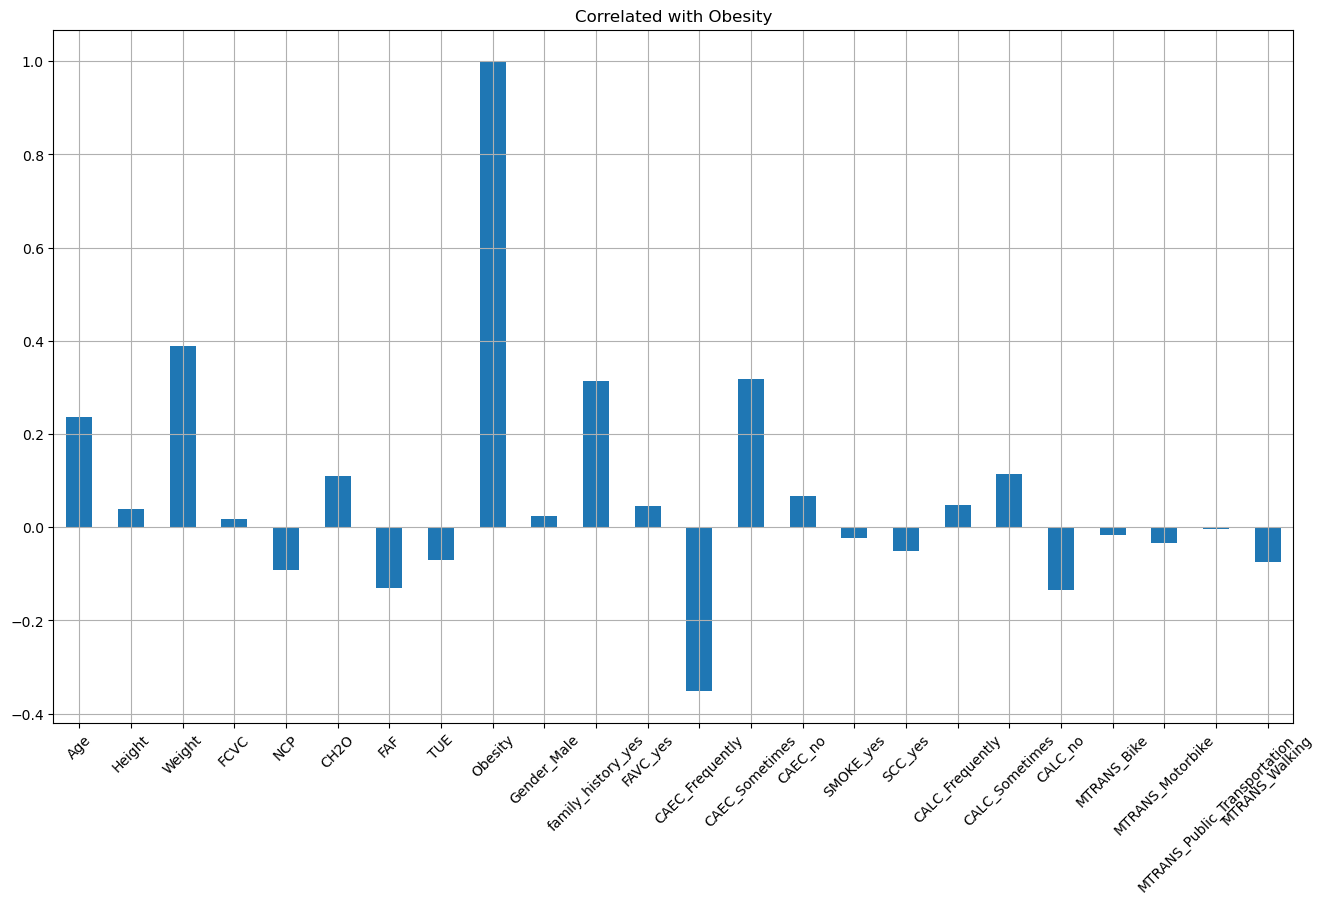

In [27]:
df.corrwith(df['Obesity']).plot.bar(
        figsize=(16,9), title='Correlated with Obesity', rot=45, grid=True
)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
columns_to_scale = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [30]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1,0,...,0,0,0,0,0,1,0,0,1,0
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1,0,...,0,1,1,0,1,0,0,0,1,0
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,5,1,...,0,0,0,1,0,0,0,0,0,1
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,6,1,...,0,0,0,0,1,0,0,0,1,0


## Split Data into Train and Test Set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(columns=['Obesity'])
y = df['Obesity']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Model Building

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


### Logistics Regression

In [35]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)

In [36]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [37]:
y_pred_log = log_reg.predict(X_test)

In [38]:
log_acc = accuracy_score(y_test, y_pred_log)

### Random Forest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred_rf = rf.predict(X_test)

In [42]:
rf_acc = accuracy_score(y_test, y_pred_rf)

### Support Vector Machine (SVM with One-vs-One)


In [43]:
svm = SVC(kernel="rbf", decision_function_shape="ovo")  # ovo = One-vs-One


In [44]:
svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [45]:
y_pred_svm = svm.predict(X_test)

In [46]:
svm_acc = accuracy_score(y_test, y_pred_svm)

### XGBoost Classifier

In [47]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [48]:
xgb.fit(X_train, y_train)

C:\Users\Dickson\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
y_pred_xgb = xgb.predict(X_test)

In [50]:
xgb_acc = accuracy_score(y_test, y_pred_xgb)

### Model Evaluation

In [51]:
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

Logistic Regression Accuracy: 0.8700
Random Forest Accuracy: 0.9551
SVM Accuracy: 0.9338
XGBoost Accuracy: 0.9527


In [53]:
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


Classification Report (XGBoost):
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.95      0.84      0.89        62
     Obesity_Type_I       0.97      0.96      0.97        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.85      0.95      0.90        56
Overweight_Level_II       1.00      0.96      0.98        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



In [55]:
import joblib

joblib.dump(xgb, "xgboost_obesity_model.pkl")

print("Model saved successfully!")

Model saved successfully!
